# Dataloader

In [2]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from torch import nn, Tensor
from torchvision.transforms import ToTensor

In [4]:
from torchvision.transforms import ToTensor

transform_to_tensor = ToTensor()

Funktion til at vise et billede fra loaderen:

In [8]:
def show_CMNIST(image, label):
    """Show image with landmarks"""
    plt.figure
    plt.imshow(image)
    plt.text(1,2,"Label: {}".format(label), backgroundcolor = "white",
             color = "black", fontsize = 8)
    plt.axis('off')
    plt.show
    plt.pause(0.001)  # pause a bit so that plots are updated

In [10]:
class CMNISTDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, pt_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.CMNIST_frame = pd.DataFrame(torch.load(pt_file))
        self.transform = transform

    def __len__(self):
        return len(self.CMNIST_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image = self.CMNIST_frame.iloc[idx, 0]
        label = self.CMNIST_frame.iloc[idx, 1]
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = {'image': self.transform(image), 'label': label}

        return sample

Printer et par eksempler fra datasættet

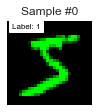

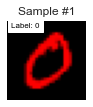

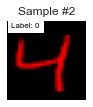

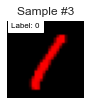

In [11]:
cmnist_data = CMNISTDataset(pt_file = "02456_Final_Project/data/ColoredMNIST/train1.pt")


fig = plt.figure()

for i in range(len(cmnist_data)):
    sample = cmnist_data[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_CMNIST(**sample)

    if i == 3:
        plt.show()
        break

Smider træningsdata_1 og testdata i hver sin loader, som kan itereres over i VAE loopet

In [ ]:
cmnist_data = CMNISTDataset(pt_file = "02456_Final_Project/data/ColoredMNIST/train1.pt"
                            , transform = transform_to_tensor)
train_loader = DataLoader(cmnist_data, batch_size=256, num_workers=0)

cmnist_test_data = CMNISTDataset(pt_file = "02456_Final_Project/data/ColoredMNIST/test.pt"
                                 , transform = transform_to_tensor)
test_loader = DataLoader(cmnist_test_data, batch_size = 512, num_workers = 0)